In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
x = df.drop('Species',axis=1)
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [10]:

nb = GaussianNB()
nb.fit(x_train_scaled, y_train)


GaussianNB()

In [11]:
y_pred = nb.predict(x_test_scaled)

In [12]:

cm = confusion_matrix(y_test, y_pred)

# Calculate Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")


In [13]:
# Print Confusion Matrix and Metrics
print("\nConfusion Matrix:\n", cm)
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.00
Error Rate: 0.00
Precision: 1.00
Recall: 1.00


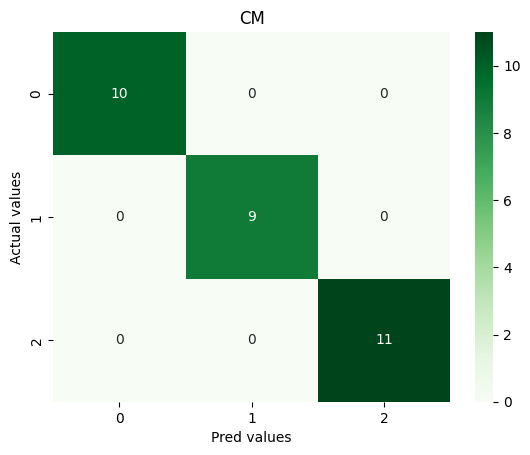

In [14]:
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.title("CM")
plt.xlabel("Pred values")
plt.ylabel("Actual values")
plt.show()
